In [1]:
import stravalib
import pandas as pd
import os
import sys
%matplotlib inline

new_path = os.path.abspath(os.path.join('..', 'flask_app', 'app'))
sys.path.append(new_path)
import strava

%load_ext autoreload
%autoreload 2

In [2]:
client = stravalib.client.Client()
access_token = os.environ.get('STRAVA_API_KEY', '')
client.access_token = access_token
athlete = client.get_athlete()

In [6]:
for activity in client.get_activities():
    break

In [14]:
club_activities = client.get_club_activities(329445)
for activity in club_activities:
    break

In [22]:
activity.description

In [9]:
club_activities = client.get_club_activities(329445)
for activity in club_activities:
    if activity.start_date_local.year != 2018:
        break
    elif activity.id not in club_df.index:
        print('\rGetting new activity {0}...'.format(activity.id)),
        act_dict = {}
        act_dict['name'] = activity.name
        act_dict['upload_id'] = activity.upload_id
        act_dict['athlete_id'] = activity.athlete.id
        act_dict['athlete_name'] = '{0} {1}'.format(activity.athlete.firstname, activity.athlete.lastname)
        act_dict['start_date_local'] = activity.start_date_local
        act_dict['moving_time'] = activity.moving_time
        act_dict['distance'] = activity.distance
        act_dict['average_speed'] = activity.average_speed
        act_dict['total_elevation_gain'] = activity.total_elevation_gain
        
        for k, v in act_dict.iteritems():
            club_df.loc[activity.id, k] = v

In [10]:
def cumulative(df, athlete_field, data_field, date):
    '''Calculates the to-date cumulative sum of the athlete's data for each activity.'''
    for athlete in set(df[athlete_field]):
        temp_df = df.loc[(df[athlete_field] == athlete),[data_field,date]]
        temp_df['id'] = temp_df.index
        temp_df = temp_df.set_index(date, drop=False)
        temp_df = temp_df.sort_index()
        temp_df['cumulative'] = temp_df.loc[:,data_field].cumsum()
        temp_df = temp_df.set_index('id')
        df.loc[df[athlete_field] == athlete,'cumulative_{0}'.format(data_field)] = temp_df['cumulative']
    
cumulative(club_df, 'athlete_id', 'distance', 'start_date_local')
cumulative(club_df, 'athlete_id', 'total_elevation_gain', 'start_date_local')
cumulative(club_df, 'athlete_id', 'moving_time', 'start_date_local')

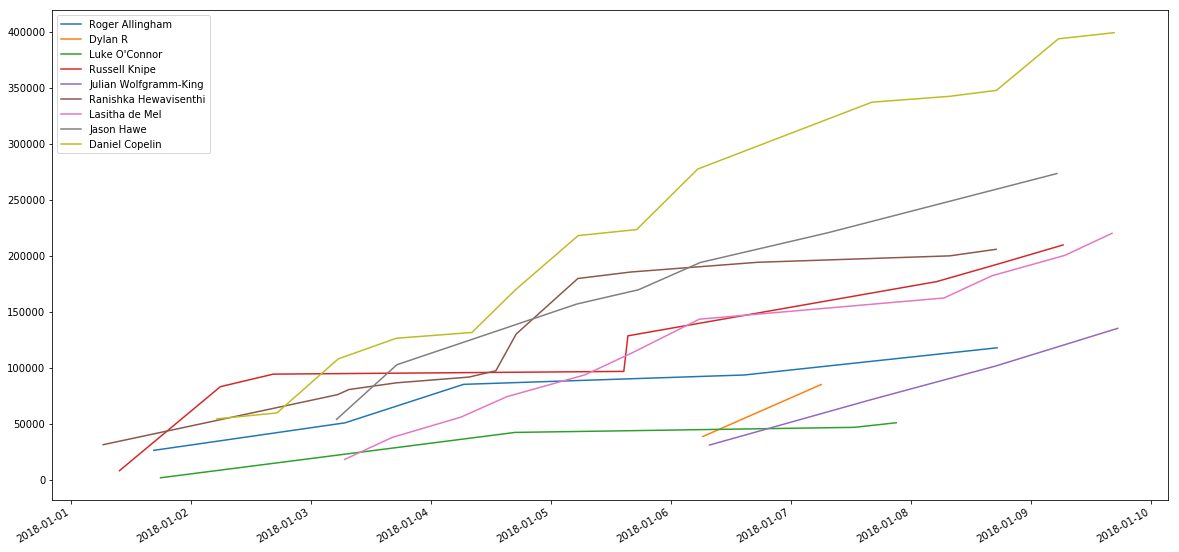

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for athlete in set(club_df['athlete_name']):
    temp_df = club_df.loc[club_df['athlete_name'] == athlete,['start_date_local','cumulative_distance']].set_index('start_date_local').sort_index()
    x, y = temp_df.index, temp_df['cumulative_distance'].values
    ax.plot(x,y,label=athlete)

ax.legend()
fig.autofmt_xdate()
fig.set_size_inches(20,10)

plt.show()

In [12]:
with pd.HDFStore('store.h5') as store:
    store['club_df'] = club_df

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->['name', 'upload_id', 'athlete_id', 'athlete_name', 'start_date_local', 'moving_time', 'distance', 'average_speed', 'total_elevation_gain', 'cumulative_distance', 'cumulative_total_elevation_gain']]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
club_df

,name,upload_id,athlete_id,athlete_name,start_date_local,moving_time,distance,average_speed,total_elevation_gain,cumulative_distance,cumulative_total_elevation_gain,cumulative_moving_time
id,,,,,,,,,,,,
1346564943,Afternoon Ride,1455084832,4399141,Russell Knipe,2018-01-08 17:47:26,0:35:05,16152.20 m,7.67 m / s,187.30 m,193039.60 m,2549.00 m,08:01:39
1346570064,"Afternoon ride (Daisy Hill, solo mtb)",1455090323,1919109,Roger Allingham,2018-01-08 17:15:52,1:19:45,24243.50 m,5.07 m / s,449.00 m,117860.70 m,1872.00 m,06:31:24
1346509197,Afternoon Ride,1455022381,16638215,Daniel Copelin,2018-01-08 17:08:40,0:14:11,5349.30 m,6.29 m / s,57.00 m,347569.40 m,4246.00 m,14:24:19
1346561178,Half loop + St Lucia bumps,1455080388,1918550,Julian Wolfgramm-King,2018-01-08 17:02:58,1:03:03,30108.00 m,7.96 m / s,396.40 m,101708.90 m,1074.00 m,03:51:13
1346493458,Afternoon Ride,1455004545,2263873,Lasitha de Mel,2018-01-08 16:14:21,0:44:30,19825.70 m,7.42 m / s,170.00 m,182153.30 m,2108.00 m,07:16:25
1346171021,Morning Ride,1454599012,16638215,Daniel Copelin,2018-01-08 07:42:19,0:13:28,5182.10 m,6.41 m / s,39.00 m,342220.10 m,4189.00 m,14:10:08
1346100892,Morning Ride,1454518151,2263873,Lasitha de Mel,2018-01-08 06:39:16,0:43:24,18928.80 m,7.27 m / s,156.00 m,162327.60 m,1938.00 m,06:31:55
1346170247,Coot-tha front and back,1454597890,4399141,Russell Knipe,2018-01-08 05:08:29,1:51:11,48328.30 m,7.25 m / s,866.30 m,176887.40 m,2361.70 m,07:26:34
1345147950,Tennis roundies,1453498042,23217232,Luke O'Connor,2018-01-07 21:05:29,0:13:02,4073.50 m,5.21 m / s,42.20 m,50984.60 m,1073.40 m,02:14:12
